In [76]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [77]:
import numpy as np
import pandas as pd

In [78]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [79]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [80]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [81]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# reflect the tables

In [82]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [83]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [84]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [85]:
inspector = inspect(engine)

In [86]:
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [87]:
columns = inspector.get_columns('Station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [101]:
# TODO: Look at this afer the end of the assignment. Calculate the date 1 year ago from the last data point in the database
# Done! Perform a query to retrieve the data and precipitation scores

date = dt.datetime(2016, 8, 22)
yearprecip = session.query(Measurement.date, Measurement.prcp, Measurement.station, Measurement.tobs).\
    filter(Measurement.date > date).\
    order_by(Measurement.date).all()

#yearprecip

In [103]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
yearprecip_df = pd.DataFrame(yearprecip, columns=['Date', 'Precip','Station', 'Temp'])
yearprecip2_df= yearprecip_df.set_index('Date')
yearprecip2_df

,Precip,Station,Temp
Date,,,
2016-08-23,0.00,USC00519397,81.0
2016-08-23,0.15,USC00513117,76.0
2016-08-23,0.05,USC00514830,80.0
2016-08-23,NaN,USC00517948,80.0
2016-08-23,0.02,USC00519523,80.0
...,...,...,...
2017-08-22,0.50,USC00516128,76.0
2017-08-23,0.00,USC00519397,81.0
2017-08-23,0.00,USC00514830,82.0


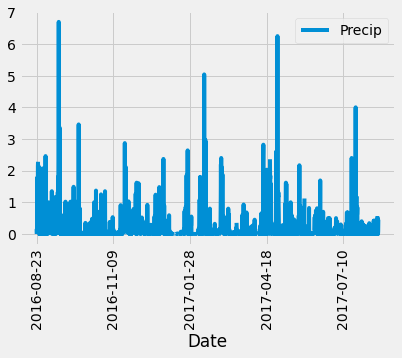

In [90]:
# Use Pandas Plotting with Matplotlib to plot the data
yearprecip2_df.plot(rot= 90)


In [91]:
# Use Pandas to calcualte the summary statistics for the precipitation data
yearprecip2_df.describe()

,Precip
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [92]:
# Design a query to show how many stations are available in this data
# Ask if the stations need to be unique:  
station_df = pd.read_sql_query("select station, name from station", engine.connect())
print(f"There are {session.query(Station.station).count()} stations")

There are 9 stations


In [93]:
#measurement_df = pd.read_sql_query("select * from measurement", engine.connect())
#measurement_df= measurement_df.set_index('id')
#measurement_df

In [94]:
measures = session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs)


In [95]:
measurement_df = pd.DataFrame(measures, columns=['ID', 'Station', 'Date' , 'Precipitation','Temp' ])
measurement_df

,ID,Station,Date,Precipitation,Temp
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [96]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stations_activity_df = measurement_df.groupby("Station").count().sort_values("ID", ascending= False).reset_index()
stations_activity_df

,Station,ID,Date,Precipitation,Temp
0,USC00519281,2772,2772,2772,2772
1,USC00519397,2724,2724,2685,2724
2,USC00513117,2709,2709,2696,2709
3,USC00519523,2669,2669,2572,2669
4,USC00516128,2612,2612,2484,2612
5,USC00514830,2202,2202,1937,2202
6,USC00511918,1979,1979,1932,1979
7,USC00517948,1372,1372,683,1372
8,USC00518838,511,511,342,511


In [99]:
# What are the most active stations? (i.e. what stations have the most rows)?
most_active_station = stations_activity_df.iloc[0]['Station']
most_active_station

'USC00519281'

In [105]:
most_active_station_df = yearprecip_df[yearprecip_df['Station'] == most_active_station]
most_active_station_df

,Date,Precip,Station,Temp
5,2016-08-23,1.79,USC00519281,77.0
12,2016-08-24,2.15,USC00519281,77.0
19,2016-08-25,0.06,USC00519281,80.0
26,2016-08-26,0.01,USC00519281,80.0
31,2016-08-27,0.12,USC00519281,75.0
...,...,...,...,...
2193,2017-08-14,0.00,USC00519281,77.0
2198,2017-08-15,0.32,USC00519281,77.0
2202,2017-08-16,0.12,USC00519281,76.0
2206,2017-08-17,0.01,USC00519281,76.0


In [2]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
active_station_yr_df = pd.DataFrame(yearprecip, columns=['ID','Station','Date', 'Precipitation','Temp'])
active_station_yr_df

NameError: name 'pd' is not defined

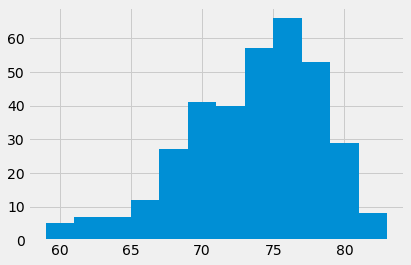

In [112]:
# Choose the station with the highest number of temperature observations.
#busy_station = Measurement.station == 'USC00519281
#date_busy = dt.datetime(2016, 8, 22)
    #busy_station = session.query(Measurement.date, Measurement.prcp)
    #filter(Measurement.date > date).\
#print(date_busy)
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station_df['Temp'].hist(bins =12)

## Climate App

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
